<a href="https://colab.research.google.com/github/Codebyjanhvi/BigBasket-Product-Analytics-/blob/main/BigBasket_Product_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv("/content/BigBasket Products.csv")
df.head()


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


**Dataset Overview**

The dataset contains product-level information from the BigBasket online grocery platform.

It includes attributes such as product name, category, sub-category, brand, price, and ratings.

This data represents the product catalog of an Indian online supermarket and is used to perform product analytics and pricing analysis.

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [134]:
df.describe(include='all')

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
count,27555.00000,27554,27555,27555,27554,27555.000000,27555.000000,27555,18929.000000,27440
unique,NaN,23540,11,90,2313,NaN,NaN,426,NaN,21944
top,NaN,Turmeric Powder/Arisina Pudi,Beauty & Hygiene,Skin Care,Fresho,NaN,NaN,Face Care,NaN,A brand inspired by the Greek goddess of victo...
freq,NaN,26,7867,2294,638,NaN,NaN,1508,NaN,47
mean,13778.00000,NaN,NaN,NaN,NaN,322.514808,382.056664,NaN,3.943410,NaN
std,7954.58767,NaN,NaN,NaN,NaN,486.263116,581.730717,NaN,0.739063,NaN
min,1.00000,NaN,NaN,NaN,NaN,2.450000,3.000000,NaN,1.000000,NaN
25%,6889.50000,NaN,NaN,NaN,NaN,95.000000,100.000000,NaN,3.700000,NaN
50%,13778.00000,NaN,NaN,NaN,NaN,190.000000,220.000000,NaN,4.100000,NaN
75%,20666.50000,NaN,NaN,NaN,NaN,359.000000,425.000000,NaN,4.300000,NaN


**Data Cleaning & Preprocessing**

The raw dataset contained missing values in several columns such as product name, brand, rating, and description.

Since product name and brand are essential identifiers and had only one missing value each, those rows were removed.

Ratings were missing for a large number of products, which is realistic in e-commerce platforms where many products do not yet have reviews.
These missing ratings were imputed using the median rating value.

Missing descriptions were filled with a placeholder value (“Not Available”).

An unnecessary index column was removed, and column names were standardized for consistency.

In [135]:
df = df.drop(columns="index")

In [136]:
df = df.dropna(subset=['product', 'brand'])


In [137]:
madian_rating = df['rating'].median()
df['rating'].fillna(madian_rating, inplace=True)

/tmp/ipython-input-3362698684.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(madian_rating, inplace=True)


In [138]:
df['description'] = df['description'].fillna("Not Available")


In [139]:
df.isnull().sum()
df.shape



(27553, 9)

In [140]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")
df.columns


Index(['product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

To support product and pricing analytics, additional business-relevant features were engineered.

A discount percentage column was created using market price and sale price to quantify promotional intensity.

Products were segmented into price bands (Very Low, Low, Medium, High, Premium) to analyze budget vs premium product distribution.

A high-discount flag was created to identify products discounted by 30% or more.

A revenue potential proxy was calculated using sale price to estimate category-level revenue contribution.

Shows how much discount BigBasket is giving

In [141]:
df['discount_pct'] = ((df['market_price'] - df['sale_price']) / df['market_price']) * 100
df['discount_pct'] = df['discount_pct'].round(2)


Price Segment (Budget / Mid / Premium)

In [142]:
price_bins = [0, 50, 200, 500, 2000, df['sale_price'].max()]
price_labels = ['Very Low', 'Low', 'Medium', 'High', 'Premium']

df['price_segment'] = pd.cut(df['sale_price'], bins=price_bins, labels=price_labels)


High Discount Flag

In [143]:
df['high_discount_flag'] = df['discount_pct'].apply(lambda x: 1 if x >= 30 else 0)


Revenue Potential Proxy

In [144]:
df['revenue_potential'] = df['sale_price'] * 1


Exploratory Data Analysis (EDA)

Exploratory analysis was performed to understand product distribution, pricing patterns, and discount behavior.

Category-wise and sub-category-wise product counts were analyzed to identify dominant product groups.

The distribution of sale prices showed a right-skewed pattern, indicating the presence of a small number of premium products and a large number of budget products.

Category-wise average prices highlighted significant price variation across categories.

Discount percentage analysis revealed that most products had moderate discounts, while a smaller proportion of products were heavily discounted.

Products were segmented into budget, mid-range, and premium groups to understand catalog composition.

Category-wise Product Count

In [145]:
category_count = df['category'].value_counts()

category_count.head(10)


,count
category,
Beauty & Hygiene,7867
Gourmet & World Food,4690
"Kitchen, Garden & Pets",3580
Snacks & Branded Foods,2814
"Foodgrains, Oil & Masala",2676
Cleaning & Household,2674
Beverages,884
"Bakery, Cakes & Dairy",851
Baby Care,610


Sub-category-wise Product Count

In [146]:
subcat_count = df['sub_category'].value_counts()

subcat_count.head(10)


,count
sub_category,
Skin Care,2294
Health & Medicine,1133
Hair Care,1028
Storage & Accessories,1015
Fragrances & Deos,1000
Bath & Hand Wash,996
Crockery & Cutlery,890
Masalas & Spices,889
"Snacks, Dry Fruits, Nuts",840


Price Distribution

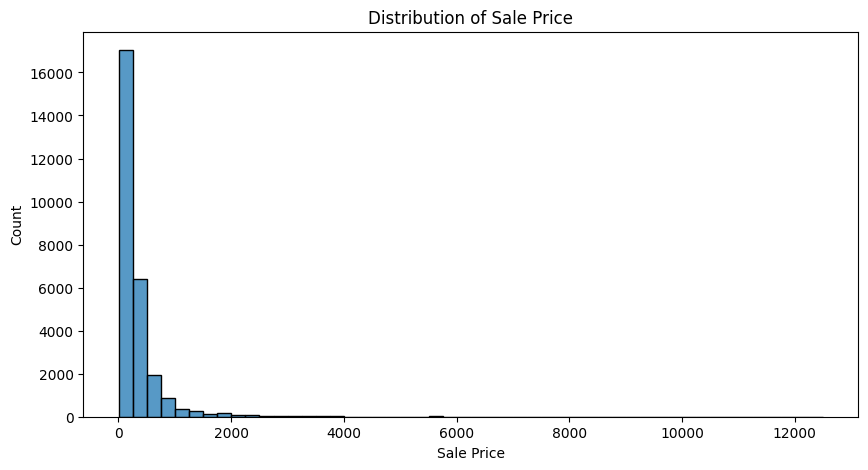

In [147]:
plt.figure(figsize=(10,5))
sns.histplot(df['sale_price'], bins=50)
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.show()


Category-wise Average Price

In [148]:
category_price = df.groupby('category')['sale_price'].mean().sort_values(ascending=False)

category_price


,sale_price
category,
Baby Care,534.946180
"Kitchen, Garden & Pets",507.524615
Beauty & Hygiene,418.679197
Gourmet & World Food,319.854011
"Eggs, Meat & Fish",288.897486
Beverages,239.803925
Cleaning & Household,226.239001
"Foodgrains, Oil & Masala",193.167500
"Bakery, Cakes & Dairy",142.802750


Discount Analysis

In [149]:
df['discount_pct'].describe()


,discount_pct
count,27553.000000
mean,11.825113
std,14.624821
min,0.000000
25%,0.000000
50%,5.000000
75%,20.000000
max,83.670000


Premium vs Budget Products

In [150]:
df['price_segment'].value_counts()


,count
price_segment,
Low,11508
Medium,8819
High,3741
Very Low,3095
Premium,390


Brand-level analysis was conducted to understand brand presence and pricing strategy across the catalog.

The number of products per brand was analyzed to identify dominant and niche brands.

Brand-wise average sale price revealed premium and budget brand positioning.

The most expensive and cheapest products were identified to understand catalog price extremes.

High-discount products were analyzed to detect aggressive promotional strategies.

Category-wise revenue potential was estimated using product sale prices as a proxy.

Brand-wise Product Count

In [151]:
brand_count = df['brand'].value_counts()

brand_count.head(10)

,count
brand,
Fresho,638
bb Royal,539
BB Home,428
DP,250
Fresho Signature,171
bb Combo,168
Amul,153
INATUR,146
Himalaya,141


Brand-wise Average Price

In [152]:
brand_price = df.groupby('brand')['sale_price'].mean().sort_values(ascending=False)

brand_price.head(10)


,sale_price
brand,
Farmina,10090.000000
Carolina Herrera,6660.000000
FITWHEY,5900.000000
Paco Rabanne,5800.000000
Bentley,5346.000000
Estee Lauder,5037.500000
Mercedes-Benz,4940.000000
Bvlgari,4400.000000
Braun,4239.913333


Top 10 Most Expensive Products

In [153]:
df.sort_values(by='sale_price', ascending=False)[
    ['product', 'brand', 'category', 'sale_price']
].head(10)


,product,brand,category,sale_price
25301,Bravura Clipper,Wahl,"Kitchen, Garden & Pets",12500.00
21761,Pet Food - N&D Team Breeder Puppy Top Farmina,Farmina,"Kitchen, Garden & Pets",10090.00
12669,Epilator SE9-9961 Legs-Body-Face,Braun,Beauty & Hygiene,8184.44
23082,"Gas Stove-4 Burner Royale Plus Schott Glass, B...",Prestige,"Kitchen, Garden & Pets",7999.00
2781,Extra Virgin Olive Oil,Abbies,Gourmet & World Food,7299.00
25797,"4 Burner Gas Stove - Marvel Plus Glass Tables,...",Prestige,"Kitchen, Garden & Pets",7270.00
1056,"Gas Stove-3 Burner Royale Plus Schott Glass, B...",Prestige,"Kitchen, Garden & Pets",6999.00
6034,Whey Protein Powder,BTN Sports,Beauty & Hygiene,6700.00
1766,Good Girl Eau De Parfum For Women,Carolina Herrera,Beauty & Hygiene,6660.00
5464,Olive Oil - Extra Virgin,Colavita,Gourmet & World Food,6500.00


Top 10 Cheapest Products

In [154]:
df.sort_values(by='sale_price', ascending=True)[
    ['product', 'brand', 'category', 'sale_price']
].head(10)


,product,brand,category,sale_price
26976,Curry Leaves,Fresho,Fruits & Vegetables,2.45
21312,Serum,Livon,Beauty & Hygiene,3.00
11306,Happy Happy Choco-Chip Cookies,Parle,Snacks & Branded Foods,5.00
17943,Fulltoss Tangy Tomato,Parle,Gourmet & World Food,5.00
21228,Dish Shine Bar,Exo,Cleaning & Household,5.00
26584,Polo - The Mint With The Hole,Nestle,Snacks & Branded Foods,5.00
27413,Layer Cake - Orange,Winkies,"Bakery, Cakes & Dairy",5.00
2761,Orbit Sugar-Free Chewing Gum - Lemon & Lime,Wrigleys,Snacks & Branded Foods,5.00
15926,Dreams Cup Cake - Choco,Elite,"Bakery, Cakes & Dairy",5.00
9971,"Tomato - Local, Organically Grown",Fresho,Fruits & Vegetables,5.00


High Discount Products (≥ 30%)

In [155]:
high_discount_products = df[df['high_discount_flag'] == 1]

high_discount_products[['product', 'brand', 'category', 'sale_price', 'market_price', 'discount_pct']].head(10)


,product,brand,category,sale_price,market_price,discount_pct
2,"Brass Angle Deep - Plain, No.2",Trm,Cleaning & Household,119.00,250.0,52.40
34,Pet Solitaire Container Set - Silver,Steelo,"Kitchen, Garden & Pets",499.00,969.0,48.50
37,Bodylicious Deodorant Spray - Mate (For Men),Engage,Beauty & Hygiene,136.50,195.0,30.00
38,"Sport Deo Spray - Fresh, for Men",Engage,Beauty & Hygiene,112.75,205.0,45.00
43,Storage/Lunch Steel Container with PP Lid - Red,Classic Essentials,"Kitchen, Garden & Pets",109.00,299.0,63.55
55,Soothing Cucumber Facial Scrub With Apricot Seeds,TJORI,Beauty & Hygiene,299.40,499.0,40.00
61,Dog Supplement - Absolute Skin + Coat Tablet,Drools,"Kitchen, Garden & Pets",348.60,498.0,30.00
62,"Peanut Butter - Creamy, Super",Happilo,Gourmet & World Food,209.40,349.0,40.00
65,Ayurvedic Anti-Tan Face Pack,TJORI,Beauty & Hygiene,269.40,449.0,40.00
72,Sesame Seed Oil,INATUR,Beauty & Hygiene,210.00,300.0,30.00


Category-wise Revenue Potential

In [156]:
category_revenue = df.groupby('category')['revenue_potential'].sum().sort_values(ascending=False)

category_revenue


,revenue_potential
category,
Beauty & Hygiene,3293749.24
"Kitchen, Garden & Pets",1816938.12
Gourmet & World Food,1500115.31
Cleaning & Household,604963.09
"Foodgrains, Oil & Masala",516916.23
Snacks & Branded Foods,364675.08
Baby Care,326317.17
Beverages,211986.67
"Bakery, Cakes & Dairy",121525.14


***Business Insights***

Brand-level analysis shows that a small number of brands dominate the product catalog, indicating high brand concentration in certain categories.

Brand-wise average sale price reveals a clear separation between premium and budget brands, suggesting strong brand-based price positioning.

The price distribution is highly right-skewed, with a small number of very expensive products significantly increasing the overall price range.

High-discount products (≥ 30%) are concentrated in specific categories, indicating category-driven promotional strategies rather than uniform discounting.

Category-wise revenue potential analysis shows that a few categories contribute a disproportionately large share of total revenue potential, indicating a Pareto effect in the product catalog.

Most products fall into low to medium price segments, suggesting that the platform primarily targets price-sensitive and mass-market consumers.

**Business Recommendations**

Focus promotional budgets on high-revenue-potential categories to maximize return on discount spend.

Reduce deep discounting on premium brands and instead test smaller discounts to protect margins.

Rationalize the product catalog by identifying low-revenue-potential and low-visibility SKUs for possible delisting.

Increase the visibility and promotion of budget and mid-range products to attract price-sensitive customers.

Design category-specific discount strategies instead of applying uniform discount rates across all categories.

Use brand-wise price positioning to negotiate better commercial terms with premium and high-volume brands.

Project Summary

This project analyzed real product catalog data from the BigBasket online grocery platform to understand category composition, brand positioning, pricing behavior, and discount strategies.

The analysis included data cleaning, feature engineering, exploratory data analysis, and advanced product and brand analytics.

Business-relevant features such as discount percentage, price segmentation, and revenue potential were engineered to support deeper insights.

The results highlighted strong brand-based price positioning, category-driven promotional strategies, and a Pareto distribution of revenue potential across categories.

The project demonstrates how product and pricing analytics can be used to support assortment planning, pricing optimization, and promotion strategy in an e-commerce environment.